In [1]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import csv
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import numpy as np
import requests
from scipy.stats import linregress
import scipy.stats as st
from scipy import stats

csvpath = os.path.join('owid-covid-data.csv')

In [3]:
covid = pd.read_csv("owid-covid-data.csv", dtype="object", encoding="utf-8")
covid.head()

,iso_code,continent,location,month,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,02-2020,24/02/2020,1,1,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,02-2020,25/02/2020,1,0,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,02-2020,26/02/2020,1,0,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,02-2020,27/02/2020,1,0,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,02-2020,28/02/2020,1,0,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


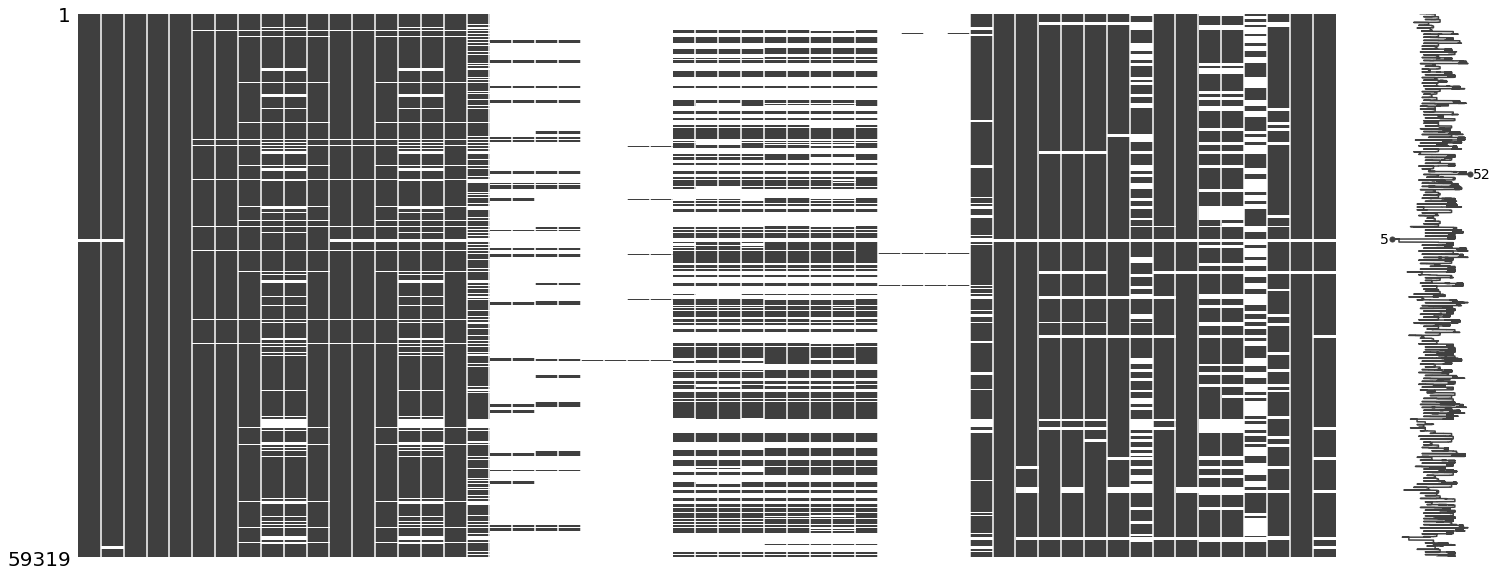

In [4]:
msno.matrix(covid)

In [5]:
covid.describe

<bound method NDFrame.describe of       iso_code continent     location    month        date total_cases  \
0          AFG      Asia  Afghanistan  02-2020  24/02/2020           1   
1          AFG      Asia  Afghanistan  02-2020  25/02/2020           1   
2          AFG      Asia  Afghanistan  02-2020  26/02/2020           1   
3          AFG      Asia  Afghanistan  02-2020  27/02/2020           1   
4          AFG      Asia  Afghanistan  02-2020  28/02/2020           1   
...        ...       ...          ...      ...         ...         ...   
59314      ZWE    Africa     Zimbabwe  01-2021   6/01/2021       17804   
59315      ZWE    Africa     Zimbabwe  01-2021   7/01/2021       18675   
59316      ZWE    Africa     Zimbabwe  01-2021   8/01/2021       19660   
59317      ZWE    Africa     Zimbabwe  01-2021   9/01/2021       20499   
59318      ZWE    Africa     Zimbabwe  01-2021  10/01/2021       21477   

      new_cases new_cases_smoothed total_deaths new_deaths  ...  \
0         

In [6]:
covid.count()

iso_code                              58980
continent                             58624
location                              59319
month                                 59319
date                                  59319
total_cases                           58772
new_cases                             58765
new_cases_smoothed                    57810
total_deaths                          50365
new_deaths                            50364
new_deaths_smoothed                   57810
total_cases_per_million               58433
new_cases_per_million                 58426
new_cases_smoothed_per_million        57476
total_deaths_per_million              50039
new_deaths_per_million                50038
new_deaths_smoothed_per_million       57476
reproduction_rate                     44995
icu_patients                           6129
icu_patients_per_million               6129
hosp_patients                          6867
hosp_patients_per_million              6867
weekly_icu_admissions           

In [7]:
#organized_df = covid[["continent", "location", "date", "total_cases","total_deaths","gdp_per_capita", "hospital_beds_per_thousand", "new_cases", "median_age", "population", "aged_65_older", "aged_70_older","total_tests" ]]
#organized_df = covid[["continent", "location", "date", "new_cases", "new_deaths", "gdp_per_capita", "hospital_beds_per_thousand", "median_age"]]
#organized_df = covid[["continent", "location", "date", "new_deaths", "hospital_beds_per_thousand"]]

In [8]:
organized_df = covid[["continent", "location", "new_deaths", "hospital_beds_per_thousand", "gdp_per_capita"]]

In [9]:
organized_df.head()

,continent,location,new_deaths,hospital_beds_per_thousand,gdp_per_capita
0,Asia,Afghanistan,NaN,0.5,1803.987
1,Asia,Afghanistan,NaN,0.5,1803.987
2,Asia,Afghanistan,NaN,0.5,1803.987
3,Asia,Afghanistan,NaN,0.5,1803.987
4,Asia,Afghanistan,NaN,0.5,1803.987


In [10]:
organized_df.count()

continent                     58624
location                      59319
new_deaths                    50364
hospital_beds_per_thousand    52429
gdp_per_capita                56462
dtype: int64

In [11]:
organized_df = organized_df.dropna(how='any')

In [12]:
organized_df.count()

continent                     42974
location                      42974
new_deaths                    42974
hospital_beds_per_thousand    42974
gdp_per_capita                42974
dtype: int64

In [13]:
organized_df

,continent,location,new_deaths,hospital_beds_per_thousand,gdp_per_capita
27,Asia,Afghanistan,1,0.5,1803.987
28,Asia,Afghanistan,0,0.5,1803.987
29,Asia,Afghanistan,0,0.5,1803.987
30,Asia,Afghanistan,1,0.5,1803.987
31,Asia,Afghanistan,1,0.5,1803.987
...,...,...,...,...,...
59314,Africa,Zimbabwe,13,1.7,1899.775
59315,Africa,Zimbabwe,15,1.7,1899.775
59316,Africa,Zimbabwe,22,1.7,1899.775
59317,Africa,Zimbabwe,15,1.7,1899.775


In [14]:
#check the data type
print(organized_df.dtypes)

continent                     object
location                      object
new_deaths                    object
hospital_beds_per_thousand    object
gdp_per_capita                object
dtype: object


In [15]:
# Use pd.to_numeric() method to convert the datatype of the new_deaths & hospital_beds_per_thousand column
organized_df['new_deaths'] = pd.to_numeric(organized_df['new_deaths'])
organized_df['hospital_beds_per_thousand'] = pd.to_numeric(organized_df['hospital_beds_per_thousand'])
organized_df['gdp_per_capita'] = pd.to_numeric(organized_df['gdp_per_capita'])

In [16]:
#check the data type again
print(organized_df.dtypes)

continent                      object
location                       object
new_deaths                      int64
hospital_beds_per_thousand    float64
gdp_per_capita                float64
dtype: object


# Total deaths VS Hospital beds per thousand

In [17]:
# The sum method adds every entry in the series
total1 = organized_df["new_deaths"].sum()
total1

1926281

In [18]:
# The mean method averages the series
average1 = organized_df["new_deaths"].mean()
average1

44.824335644808485

In [19]:
# The sum method adds every entry in the series
total2 = organized_df["hospital_beds_per_thousand"].sum()
total2

129489.57099999998

In [20]:
# The mean method averages the series
average2 = organized_df["hospital_beds_per_thousand"].mean()
average2

3.0132073113979563

In [21]:
# The unique method shows every element of the series that appears only once
unique1 = organized_df["location"].unique()
unique1

array(['Afghanistan', 'Albania', 'Algeria', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cameroon', 'Canada', 'Cape Verde',
       'Central African Republic', 'Chile', 'China', 'Colombia',
       'Comoros', 'Costa Rica', 'Croatia', 'Cyprus', 'Czechia', 'Denmark',
       'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland',
       'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', '

In [22]:
# The unique method shows every element of the series that appears only once
unique2 = organized_df["continent"].unique()
unique2

array(['Asia', 'Europe', 'Africa', 'North America', 'South America',
       'Oceania'], dtype=object)

In [23]:
# The value_counts method counts unique values in a column
count1 = organized_df["continent"].value_counts()
count1

Europe           12365
Asia             10888
Africa           10350
North America     5053
South America     3550
Oceania            768
Name: continent, dtype: int64

In [24]:
# The value_counts method counts unique values in a column
count2 = organized_df["location"].value_counts()
count2

China          354
Philippines    344
Japan          333
France         331
Iran           327
              ... 
Vietnam        164
Fiji           164
Saint Lucia     62
Eritrea         20
Mongolia        13
Name: location, Length: 150, dtype: int64

In [25]:
organized_df.describe()

,new_deaths,hospital_beds_per_thousand,gdp_per_capita
count,42974.000000,42974.000000,42974.000000
mean,44.824336,3.013207,21498.421953
std,176.567623,2.394959,20461.425095
min,-1918.000000,0.100000,661.240000
25%,0.000000,1.300000,6253.104000
50%,2.000000,2.400000,15663.986000
75%,14.000000,4.200000,31400.840000
max,4194.000000,13.050000,116935.600000


In [26]:
# Create a new DataFrame that looks into a specific region (eg: Italy)
Italy_df = organized_df.loc[organized_df["location"] == "Italy"]
Italy_df

,continent,location,new_deaths,hospital_beds_per_thousand,gdp_per_capita
26268,Europe,Italy,1,3.18,35220.084
26269,Europe,Italy,1,3.18,35220.084
26270,Europe,Italy,1,3.18,35220.084
26271,Europe,Italy,4,3.18,35220.084
26272,Europe,Italy,3,3.18,35220.084
...,...,...,...,...,...
26588,Europe,Italy,548,3.18,35220.084
26589,Europe,Italy,414,3.18,35220.084
26590,Europe,Italy,620,3.18,35220.084
26591,Europe,Italy,483,3.18,35220.084


In [27]:
organized_df

,continent,location,new_deaths,hospital_beds_per_thousand,gdp_per_capita
27,Asia,Afghanistan,1,0.5,1803.987
28,Asia,Afghanistan,0,0.5,1803.987
29,Asia,Afghanistan,0,0.5,1803.987
30,Asia,Afghanistan,1,0.5,1803.987
31,Asia,Afghanistan,1,0.5,1803.987
...,...,...,...,...,...
59314,Africa,Zimbabwe,13,1.7,1899.775
59315,Africa,Zimbabwe,15,1.7,1899.775
59316,Africa,Zimbabwe,22,1.7,1899.775
59317,Africa,Zimbabwe,15,1.7,1899.775


In [28]:
# It is also possible to group a DataFrame by multiple columns
# This returns an object with multiple indexes, however, which can be harder to deal with
grouped_international_data = organized_df.groupby(['continent', 'location'])

grouped_international_data.count().head(20)

new_deaths  hospital_beds_per_thousand  \
continent location                                                           
Africa    Algeria                          305                         305   
          Benin                            280                         280   
          Botswana                         286                         286   
          Burkina Faso                     299                         299   
          Burundi                          273                         273   
          Cameroon                         292                         292   
          Cape Verde                       293                         293   
          Central African Republic         233                         233   
          Comoros                          250                         250   
          Djibouti                         276                         276   
          Egypt                            309                         309   
          Equatorial Guinea                264                         264   
          Eritrea                           20                          20   
          Eswatini                         270                         270   
          Ethiopia                         281                         281   
          Gabon                            297                         297   
          Gambia                           294                         294   
          Ghana                            296                         296   
          Guinea                           271                         271   
          Kenya                            291                         291   

                                    gdp_per_capita  
continent location                                  
Africa    Algeria                              305  
          Benin                                280  
          Botswana                             286  
          Burkina Faso                         299  
          Burundi                              273  
          Cameroon                             292  
          Cape Verde                           293  
          Central African Republic             233  
          Comoros                              250  
          Djibouti                             276  
          Egypt                                309  
          Equatorial Guinea                    264  
          Eritrea                               20  
          Eswatini                             270  
          Ethiopia                             281  
          Gabon                                297  
          Gambia                               294  
          Ghana                                296  
          Guinea                               271  
          Kenya                                291

In [29]:
grouped_international_data = organized_df.groupby(['continent', 'location']).agg({'new_deaths':'sum','hospital_beds_per_thousand':'mean', 'gdp_per_capita':'mean'})
grouped_international_data

new_deaths  hospital_beds_per_thousand  \
continent     location                                               
Africa        Algeria             2807                         1.9   
              Benin                 44                         0.5   
              Botswana              48                         1.8   
              Burkina Faso          89                         0.4   
              Burundi                2                         0.8   
...                                ...                         ...   
South America Paraguay            2405                         1.3   
              Peru               38049                         1.6   
              Suriname             133                         3.1   
              Uruguay              256                         2.8   
              Venezuela           1061                         0.8   

                            gdp_per_capita  
continent     location                      
Africa        Algeria            13913.839  
              Benin               2064.236  
              Botswana           15807.374  
              Burkina Faso        1703.102  
              Burundi              702.225  
...                                    ...  
South America Paraguay            8827.010  
              Peru               12236.706  
              Suriname           13767.119  
              Uruguay            20551.409  
              Venezuela          16745.022  

[150 rows x 3 columns]

In [30]:
# Rename columns for readability
covid_renamed_df = grouped_international_data.rename(columns={"new_deaths": "Total deaths", "hospital_beds_per_thousand": "Hospital beds per thousand", "gdp_per_capita": "GDP per capita"})
covid_renamed_df

Total deaths  Hospital beds per thousand  \
continent     location                                                 
Africa        Algeria               2807                         1.9   
              Benin                   44                         0.5   
              Botswana                48                         1.8   
              Burkina Faso            89                         0.4   
              Burundi                  2                         0.8   
...                                  ...                         ...   
South America Paraguay              2405                         1.3   
              Peru                 38049                         1.6   
              Suriname               133                         3.1   
              Uruguay                256                         2.8   
              Venezuela             1061                         0.8   

                            GDP per capita  
continent     location                      
Africa        Algeria            13913.839  
              Benin               2064.236  
              Botswana           15807.374  
              Burkina Faso        1703.102  
              Burundi              702.225  
...                                    ...  
South America Paraguay            8827.010  
              Peru               12236.706  
              Suriname           13767.119  
              Uruguay            20551.409  
              Venezuela          16745.022  

[150 rows x 3 columns]

In [31]:
# Sorting the DataFrame based on "Hospital beds per thousand" column
hospital_beds_per_thousand_high = covid_renamed_df.sort_values("Hospital beds per thousand", ascending=False)
hospital_beds_per_thousand_high.head()

Total deaths  Hospital beds per thousand  \
continent location                                                
Asia      Japan                3850                       13.05   
          South Korea          1140                       12.27   
Europe    Belarus              1517                       11.00   
          Ukraine             20641                        8.80   
          Russia              60963                        8.05   

                       GDP per capita  
continent location                     
Asia      Japan             39002.223  
          South Korea       35938.374  
Europe    Belarus           17167.967  
          Ukraine            7894.393  
          Russia            24765.954

In [32]:
# Sorting the DataFrame based on "Hospital beds per thousand" column
hospital_beds_per_thousand_low = covid_renamed_df.sort_values("Hospital beds per thousand")
hospital_beds_per_thousand_low.head()

Total deaths  Hospital beds per thousand  GDP per capita
continent location                                                            
Africa    Mali                 298                         0.1        2014.306
          Madagascar           267                         0.2        1416.440
          Niger                126                         0.3         926.000
          Ethiopia            1994                         0.3        1729.927
          Guinea                81                         0.3        1998.926

In [33]:
# Sorting the DataFrame based on "Total deaths" column
total_deaths_high = covid_renamed_df.sort_values("Total deaths", ascending=False)
total_deaths_high.head()

,,Total deaths,Hospital beds per thousand,GDP per capita
continent,location,,,
North America,United States,374322,2.77,54225.446
South America,Brazil,203100,2.20,14103.452
Asia,India,151160,0.53,6426.674
North America,Mexico,133706,1.38,17336.469
Europe,United Kingdom,81567,2.54,39753.244


In [34]:
# Sorting the DataFrame based on "hospital_beds_per_thousand" column
total_deaths_low = covid_renamed_df.sort_values("Total deaths")
total_deaths_low.head()

,,Total deaths,Hospital beds per thousand,GDP per capita
continent,location,,,
Africa,Burundi,2,0.8,702.225
Asia,Mongolia,2,7.0,11840.846
Oceania,Fiji,2,2.3,8702.975
Asia,Brunei,3,2.7,71809.251
Africa,Eritrea,3,0.7,1510.459


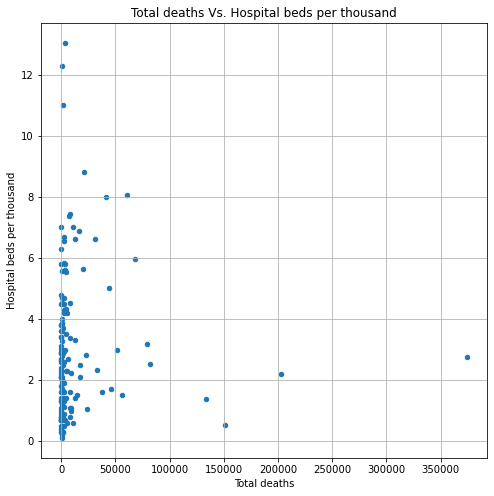

In [35]:
# Create a scatter plot which compares total deaths to hospital beds per thousand
covid_renamed_df.plot(kind="scatter", x="Total deaths", y="Hospital beds per thousand", grid=True, figsize=(8,8),
              title="Total deaths Vs. Hospital beds per thousand")
plt.show()

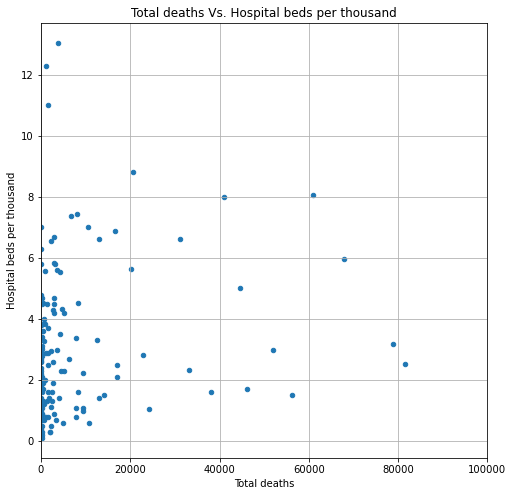

In [36]:
# Create a scatter plot which compares total deaths to hospital beds per thousand (limit the x axis from 0 to 100000)
covid_renamed_df.plot(kind="scatter", x="Total deaths", y="Hospital beds per thousand", grid=True, figsize=(8,8),
              title="Total deaths Vs. Hospital beds per thousand")
plt.xlim(0, 100000)
plt.show()

In [37]:
# Compute the Pearson correlation coefficient between "Total deaths" and "Hospital beds per thousand"
Total_deaths = covid_renamed_df["Total deaths"]
Hospital_beds_per_thousand = covid_renamed_df["Hospital beds per thousand"]
correlation = st.pearsonr(Total_deaths,Hospital_beds_per_thousand)
print(f"The correlation between both factors is {round(correlation[0],10)}")

The correlation between both factors is 0.0102488385


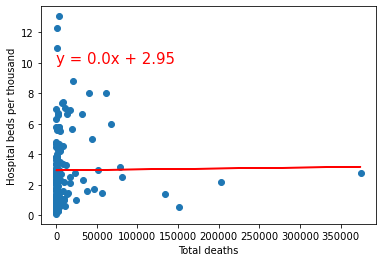

In [38]:
# Add the linear regression equation and line to plot
x_values = covid_renamed_df['Total deaths']
y_values = covid_renamed_df['Hospital beds per thousand']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Total deaths')
plt.ylabel('Hospital beds per thousand')
plt.show()

The r-squared is: 0.00010503868991530593


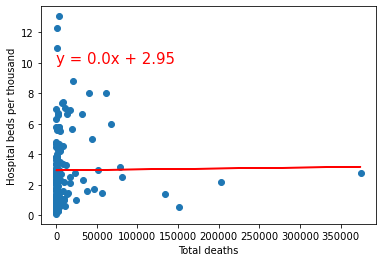

In [39]:
# Print out the r-squared value along with the plot.
x_values = covid_renamed_df['Total deaths']
y_values = covid_renamed_df['Hospital beds per thousand']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Total deaths')
plt.ylabel('Hospital beds per thousand')
print(f"The r-squared is: {rvalue**2}")
plt.show()

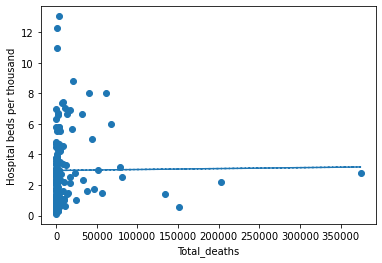

In [40]:
# Perform a linear regression on total deaths versus hospital beds per thousand
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(Total_deaths, Hospital_beds_per_thousand)

# Create equation of line to calculate predicted hospital beds per thousand
vc_fit = vc_slope * Total_deaths + vc_int

# Plot the linear model on top of scatter plot 
Total_deaths = covid_renamed_df["Total deaths"]
Hospital_beds_per_thousand = covid_renamed_df["Hospital beds per thousand"]
plt.scatter(Total_deaths,Hospital_beds_per_thousand)
plt.plot(Total_deaths,vc_fit,"--")
##plt.xticks(Total deaths, rotation=90)???
plt.xlabel('Total_deaths')
plt.ylabel('Hospital beds per thousand')
plt.show()

In [41]:
#organized_df['continent'].value_counts()

In [42]:
#organized_df['date'] = pd.to_datetime(organized_df["date"])
#organized_df['date']

In [43]:
#organized_df['mnth_yr'] = organized_df['date'].apply(lambda x: x.strftime('%B-%Y')) 
#organized_df['month_year'] = organized_df['date'].dt.strftime('%B-%Y')
#organized_df

In [44]:
#organized_df["year"] = organized_df["date"].dt.year
#organized_df["month"] = organized_df["date"].dt.month
#organized_df

In [45]:
#organized_group = organized_df.groupby(["location", "continent"]).sum()
#organized_group = organized_df.groupby(["location", "continent", "new_deaths", "hospital_beds_per_thousand"]).sum()
#organized_group

# Total Deaths vs Median age


In [46]:
#

# Total Deaths and Total GDP

In [47]:
## The sum method adds every entry in the series
total3 = organized_df["gdp_per_capita"].sum()
total3

923873184.9999999

In [48]:
# The mean method averages the series
average3 = organized_df["gdp_per_capita"].mean()
average3

21498.421952806686

In [49]:
gdp_per_capita_high = covid_renamed_df.sort_values("GDP per capita", ascending=False)
gdp_per_capita_high.head()

Total deaths  Hospital beds per thousand  GDP per capita
continent location                                                            
Asia      Qatar                246                        1.20      116935.600
Europe    Luxembourg           527                        4.51       94277.965
Asia      Singapore             29                        2.40       85535.383
          Brunei                 3                        2.70       71809.251
Europe    Ireland             2344                        2.96       67335.293

In [50]:
gdp_per_capita_low = covid_renamed_df.sort_values("GDP per capita")
gdp_per_capita_low.head()

Total deaths  Hospital beds per thousand  \
continent location                                                             
Africa    Central African Republic            63                         1.0   
          Burundi                              2                         0.8   
          Liberia                             83                         0.8   
          Niger                              126                         0.3   
          Malawi                             225                         1.3   

                                    GDP per capita  
continent location                                  
Africa    Central African Republic         661.240  
          Burundi                          702.225  
          Liberia                          752.788  
          Niger                            926.000  
          Malawi                          1095.042

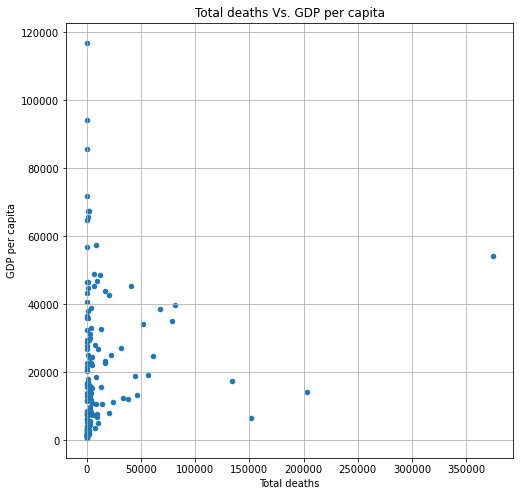

In [51]:
# Create a scatter plot which compares total deaths to hospital beds per thousand
covid_renamed_df.plot(kind="scatter", x="Total deaths", y="GDP per capita", grid=True, figsize=(8,8),
              title="Total deaths Vs. GDP per capita")
plt.show()

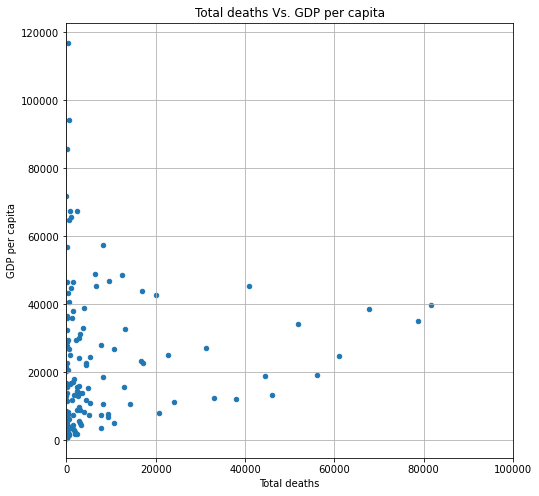

In [52]:
# Create a scatter plot which compares total deaths to hospital beds per thousand (limit the x axis from 0 to 100000)
covid_renamed_df.plot(kind="scatter", x="Total deaths", y="GDP per capita", grid=True, figsize=(8,8),
              title="Total deaths Vs. GDP per capita")
plt.xlim(0, 100000)
plt.show()

In [53]:
# Compute the Pearson correlation coefficient between "Total deaths" and "GDP per capita"
Total_deaths = covid_renamed_df["Total deaths"]
gdp_per_capita = covid_renamed_df["GDP per capita"]
correlation = st.pearsonr(Total_deaths,gdp_per_capita)
print(f"The correlation between both factors is {round(correlation[0],10)}")

The correlation between both factors is 0.1173729232


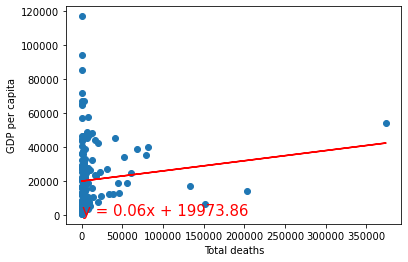

In [54]:
# Add the linear regression equation and line to plot
x_values = covid_renamed_df['Total deaths']
y_values = covid_renamed_df['GDP per capita']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Total deaths')
plt.ylabel('GDP per capita')
plt.show()

The r-squared is: 0.013776403101048421


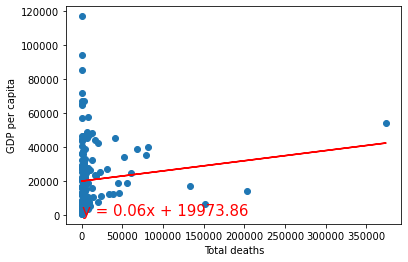

In [55]:
# Print out the r-squared value along with the plot.
x_values = covid_renamed_df['Total deaths']
y_values = covid_renamed_df['GDP per capita']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Total deaths')
plt.ylabel('GDP per capita')
print(f"The r-squared is: {rvalue**2}")
plt.show()

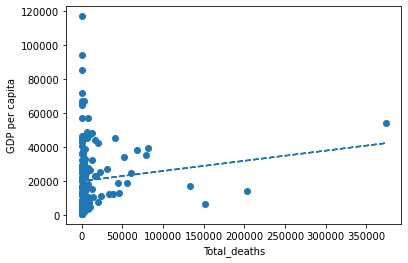

In [56]:
# Perform a linear regression on total deaths versus hospital beds per thousand
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(Total_deaths, gdp_per_capita)

# Create equation of line to calculate predicted hospital beds per thousand
vc_fit = vc_slope * Total_deaths + vc_int

# Plot the linear model on top of scatter plot 
Total_deaths = covid_renamed_df["Total deaths"]
Hospital_beds_per_thousand = covid_renamed_df["GDP per capita"]
plt.scatter(Total_deaths,gdp_per_capita)
plt.plot(Total_deaths,vc_fit,"--")
###plt.xticks(Total_deaths, rotation=90)??
plt.xlabel('Total_deaths')
plt.ylabel('GDP per capita')
plt.show()

# Total Deaths vs Total Cases

In [57]:
#

In [58]:
# Export file as a CSV, without the Pandas index, but with the header
#organized_df.to_csv("fileOne.csv", index=False, header=True)